# [Python for data analysis] - Diabetes Dataset

## Data Exploration 

### Importation of all the librairies that we will use

In [1]:
import pandas as pd 
#from pandas import Series, DataFrame
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
plt.style.use('default')

### Importation of the dataset

In [3]:
diabetes_df = pd.read_csv('diabetic_data.csv', sep =',')
diabetes_df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


### First overview

In [4]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

### Counting unknown values

In [5]:
diabetes_df = diabetes_df.replace('?', np.NaN)

In [6]:
missing_values = diabetes_df.isna().sum() / len(diabetes_df)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values = missing_values.to_frame()
missing_values

,0
diag_1,0.000206
diag_2,0.003518
diag_3,0.013983
race,0.022336
payer_code,0.395574
medical_specialty,0.490822
weight,0.968585


### Dropping columns with too much missing values

In [7]:
diabetes_df.drop(columns = ['weight', 'medical_specialty', 'payer_code', 'encounter_id'], inplace = True)

### Dropping redundant rows

In [8]:
diabetes_df.drop_duplicates(subset = "patient_nbr", keep = 'first', inplace = True)

### Setting the patient number as the index

In [9]:
diabetes_df.set_index('patient_nbr', inplace = True)

### Rethink some colums format

#### Diag_1, Diag_2, Diag_3: mapping ICD9 codes with corresponding names

https://www.hindawi.com/journals/bmri/2014/781670/tab2/

In [106]:
map_diag_123 = {'Circulatory' : [x for x in range(390,460)]+[785],
                'Respiratory' : [x for x in range(460,519)]+[786],
                'Digestive' : [x for x in range(520,580)]+[787],
                'Diabetes' : list(set(np.linspace(250, 251, 101)) - set([251])),
                'Injury' : [x for x in range(800,1000)],
                'Musculoskeletal' : [x for x in range(710,440)],
                'Genitourinary' : [x for x in range(580,630)]+[788],
                'Neoplasms' : list(set([x for x in range(1,280)] + [780, 781, 782, 784] + [x for x in range(790, 799)] + [x for x in range(680, 709)] + [x for x in range(290, 320)]) - set([250]))}
map_diag_123

{'Circulatory': [390,
  391,
  392,
  393,
  394,
  395,
  396,
  397,
  398,
  399,
  400,
  401,
  402,
  403,
  404,
  405,
  406,
  407,
  408,
  409,
  410,
  411,
  412,
  413,
  414,
  415,
  416,
  417,
  418,
  419,
  420,
  421,
  422,
  423,
  424,
  425,
  426,
  427,
  428,
  429,
  430,
  431,
  432,
  433,
  434,
  435,
  436,
  437,
  438,
  439,
  440,
  441,
  442,
  443,
  444,
  445,
  446,
  447,
  448,
  449,
  450,
  451,
  452,
  453,
  454,
  455,
  456,
  457,
  458,
  459,
  785],
 'Respiratory': [460,
  461,
  462,
  463,
  464,
  465,
  466,
  467,
  468,
  469,
  470,
  471,
  472,
  473,
  474,
  475,
  476,
  477,
  478,
  479,
  480,
  481,
  482,
  483,
  484,
  485,
  486,
  487,
  488,
  489,
  490,
  491,
  492,
  493,
  494,
  495,
  496,
  497,
  498,
  499,
  500,
  501,
  502,
  503,
  504,
  505,
  506,
  507,
  508,
  509,
  510,
  511,
  512,
  513,
  514,
  515,
  516,
  517,
  518,
  786],
 'Digestive': [520,
  521,
  522,
  523,
  524,
  5

In [108]:
diabetes_df.diag_1.apply(lambda x: map_diag_123[''])

patient_nbr
8222157      250.83
55629189        276
86047875        648
82442376          8
42519267        197
              ...  
183087545       574
188574944       592
140199494       996
120975314       292
175429310       530
Name: diag_1, Length: 71518, dtype: object

## Data Visualization

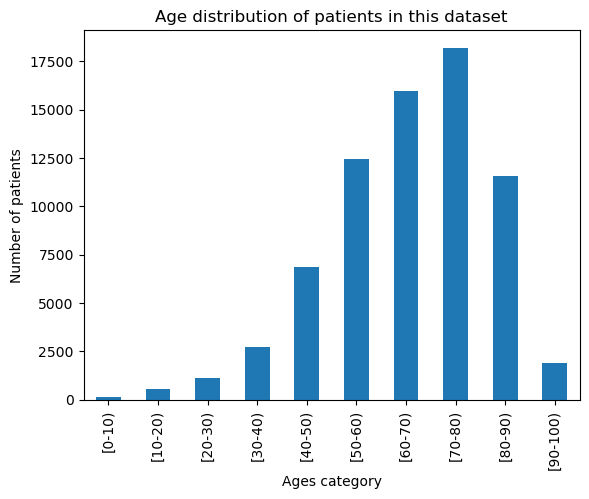

In [10]:
diabetes_df.groupby('age').size().plot(kind='bar')
plt.title('Age distribution of patients in this dataset')
plt.xlabel('Ages category')
plt.ylabel('Number of patients')
plt.savefig("Plots\AgeDistribution.png")

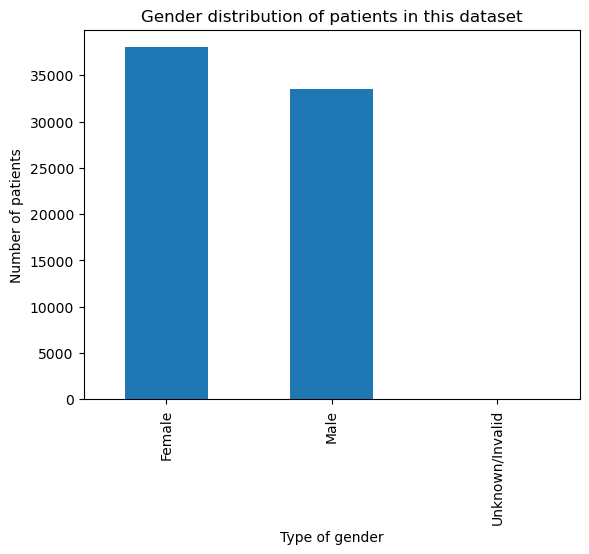

In [11]:
diabetes_df.groupby('gender').size().plot(kind='bar')
plt.title('Gender distribution of patients in this dataset')
plt.xlabel('Type of gender')
plt.ylabel('Number of patients')
plt.savefig("Plots\GenderDistribution.png")

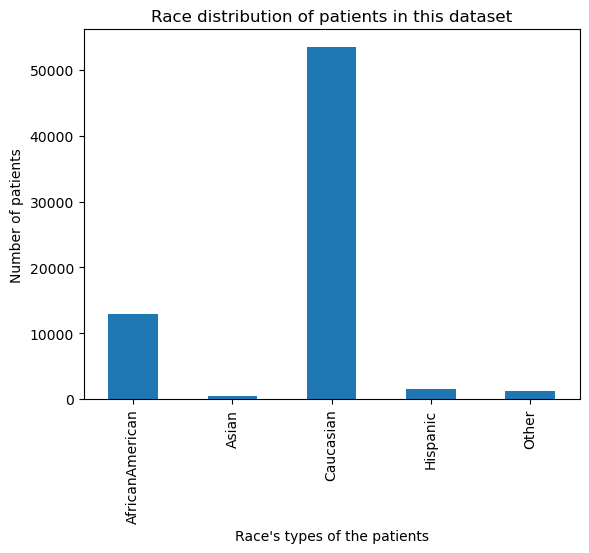

In [12]:
diabetes_df.groupby('race').size().plot(kind='bar')
plt.title('Race distribution of patients in this dataset')
plt.xlabel("Race's types of the patients")
plt.ylabel('Number of patients')
plt.savefig("Plots\RaceDistribution.png")

<AxesSubplot:ylabel='None'>

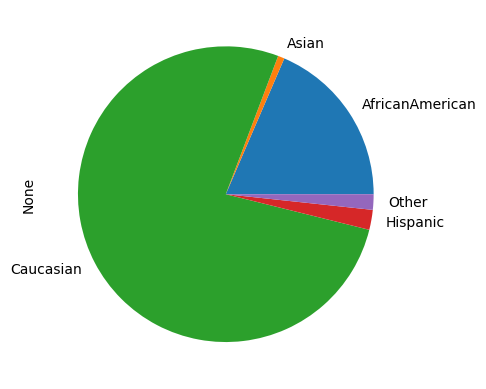

In [13]:
diabetes_df.groupby('race').size().plot(kind='pie')